In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pyarrow.parquet as pq
import os

def compare_monthly_stats(year_1, year_2, months, base_path):
    results = {}
    
    for month in months:
        file_1 = os.path.join(base_path, f"fhvhv_tripdata_{year_1}-{month:02d}.parquet")
        file_2 = os.path.join(base_path, f"fhvhv_tripdata_{year_2}-{month:02d}.parquet")
        
        try:
            # Load datasets
            data_1 = pq.read_table(file_1).to_pandas()
            data_2 = pq.read_table(file_2).to_pandas()
            
            # Calculate statistics
            stats_1 = {
                "Row Count": len(data_1),
                "Avg Miles": data_1["trip_miles"].mean(),
                "Avg Time (min)": data_1["trip_time"].mean() / 60
            }
            stats_2 = {
                "Row Count": len(data_2),
                "Avg Miles": data_2["trip_miles"].mean(),
                "Avg Time (min)": data_2["trip_time"].mean() / 60
            }
            
            results[month] = {f"{year_1}": stats_1, f"{year_2}": stats_2}
            
            # Hourly plots
            for data, year in [(data_1, year_1), (data_2, year_2)]:
                data['hour'] = data['pickup_datetime'].dt.hour
                hourly_counts = data.groupby('hour').size()
                
                # Plot
                plt.figure(figsize=(10, 6))
                plt.plot(hourly_counts.index, hourly_counts.values, marker='o', label=f"{year}-{month:02d}")
                plt.title(f"Hourly Trip Counts for {year}-{month:02d}", fontsize=14)
                plt.xlabel("Hour of Day", fontsize=12)
                plt.ylabel("Number of Trips", fontsize=12)
                plt.xticks(range(0, 24))
                plt.grid(True, linestyle='--', alpha=0.6)
                plt.legend()
                plt.show()
        
        except Exception as e:
            results[month] = f"Error: {e}"
    
    return results

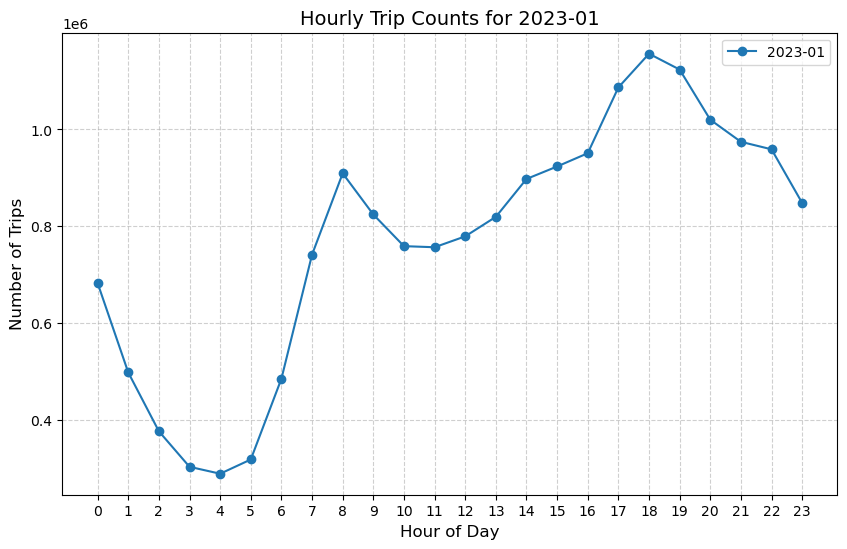

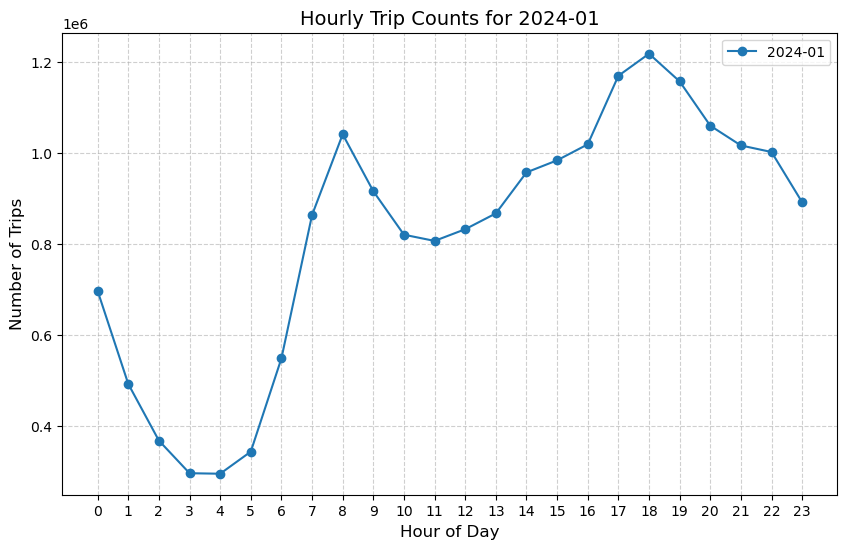

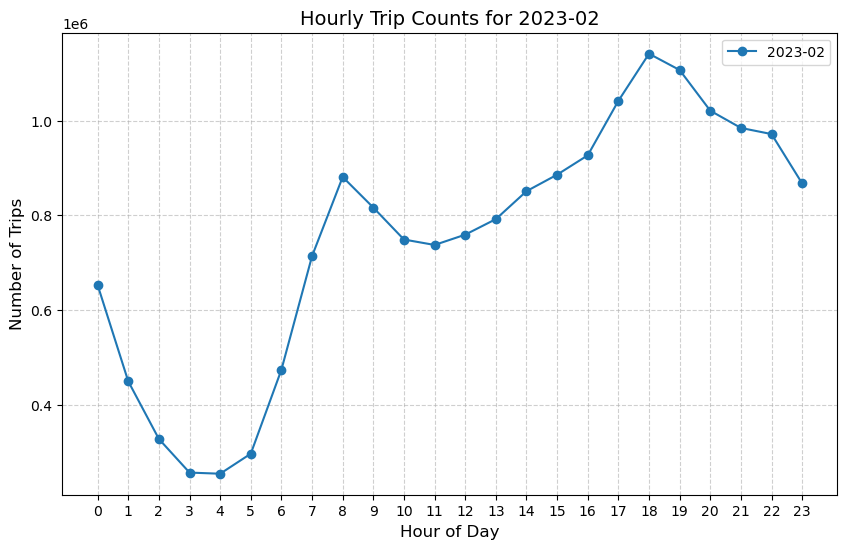

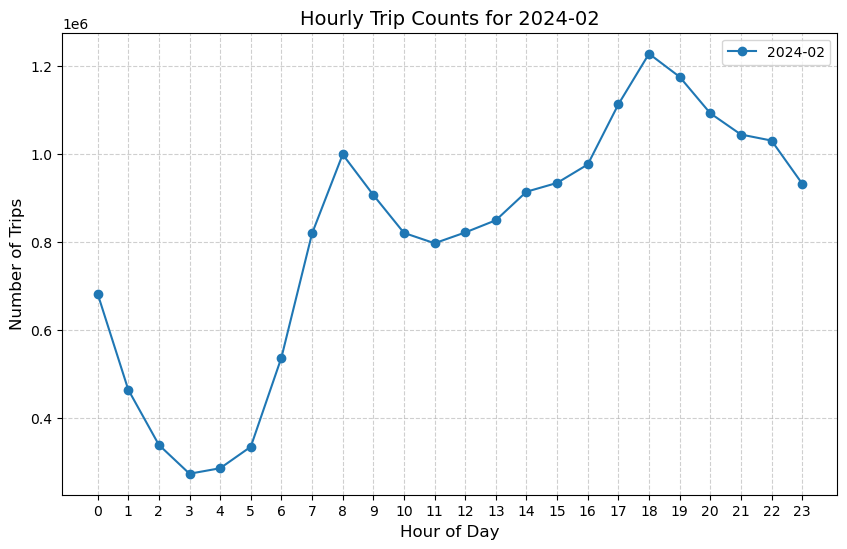

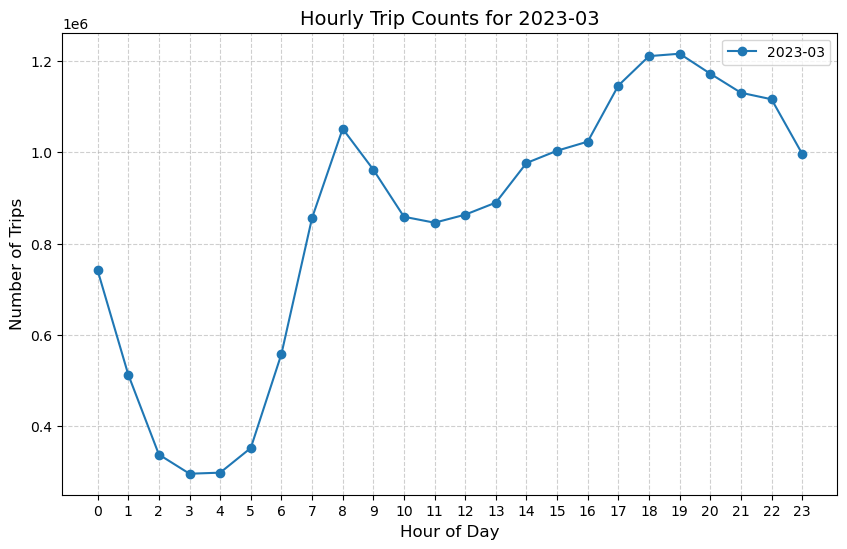

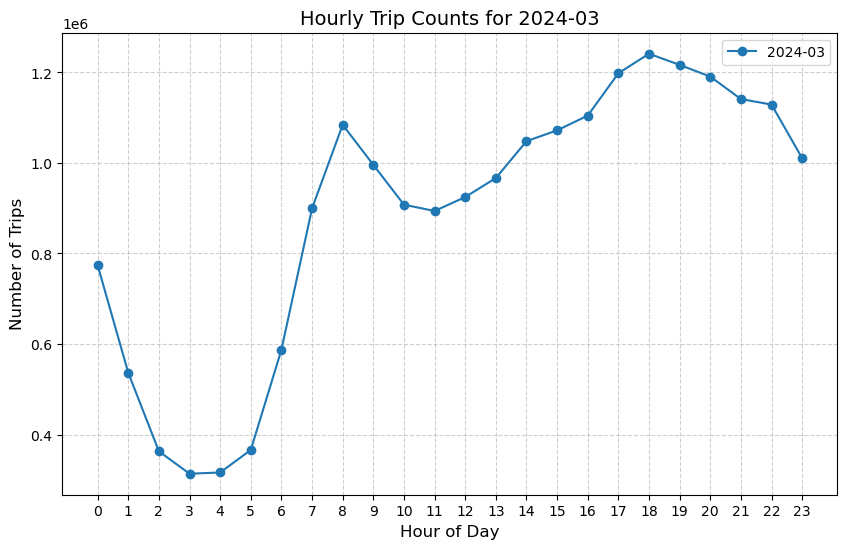

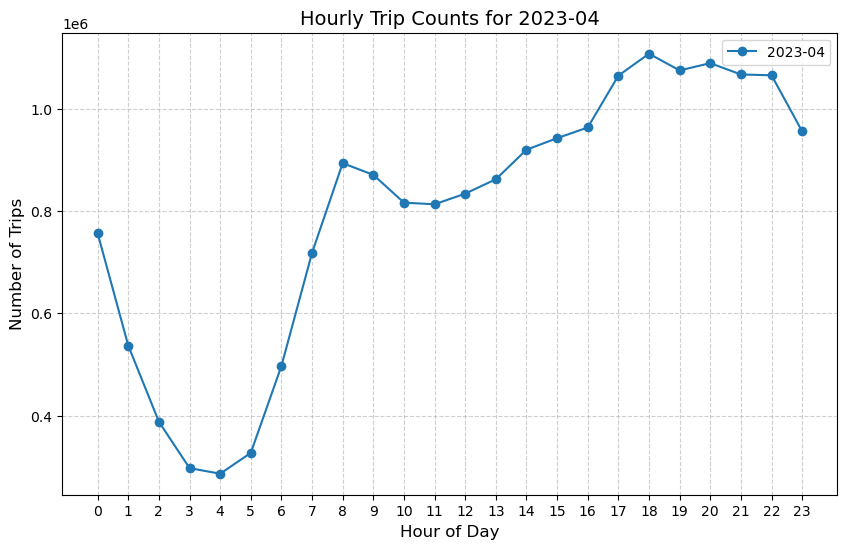

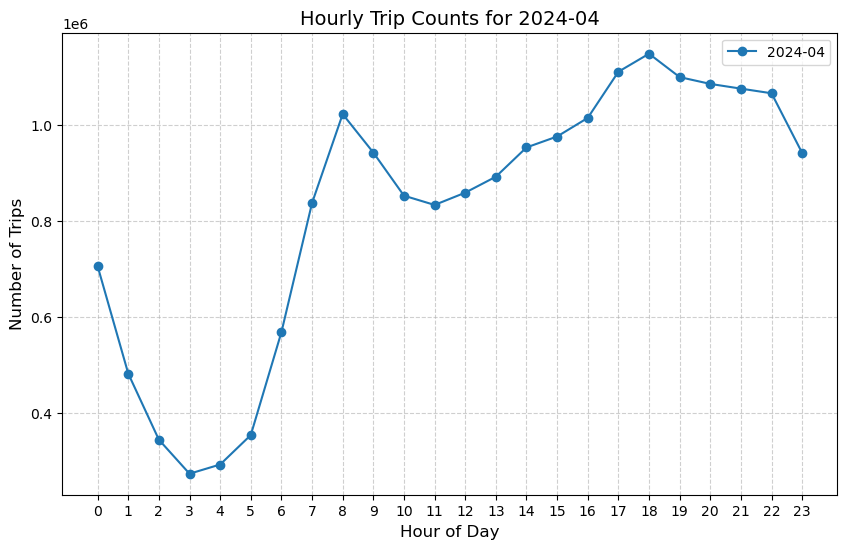

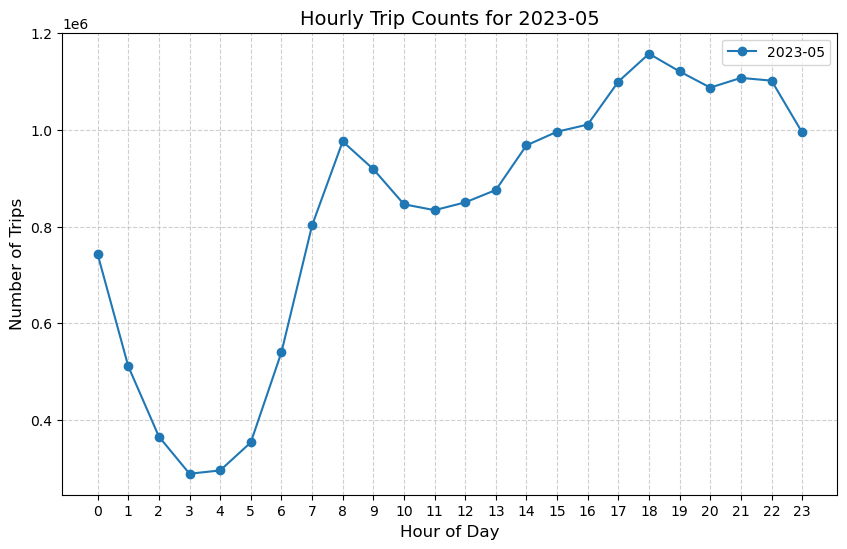

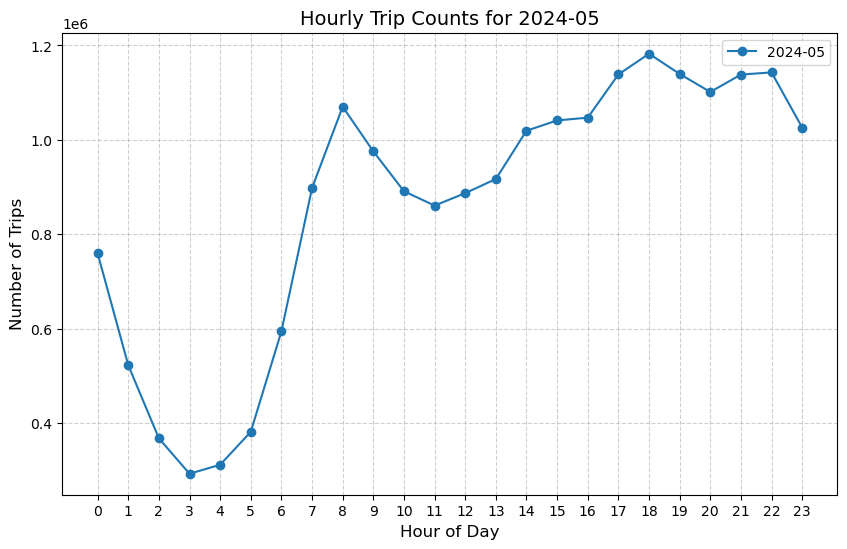

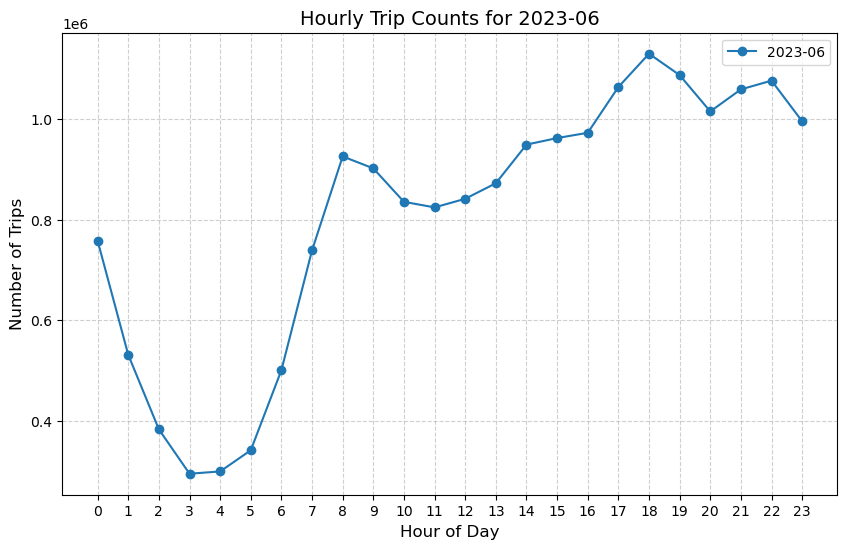

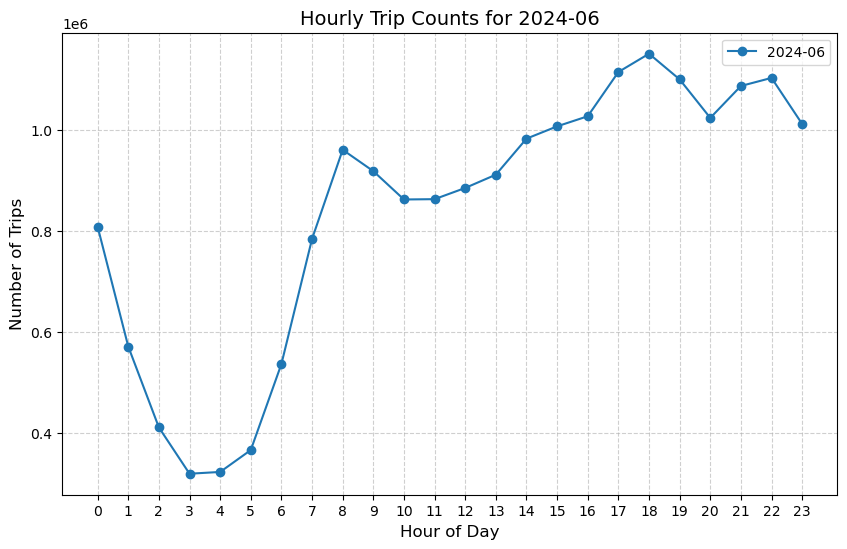

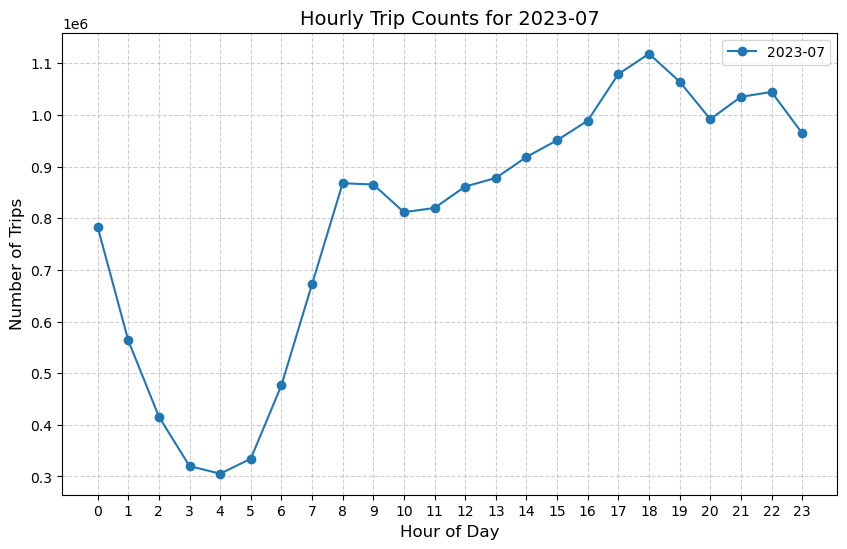

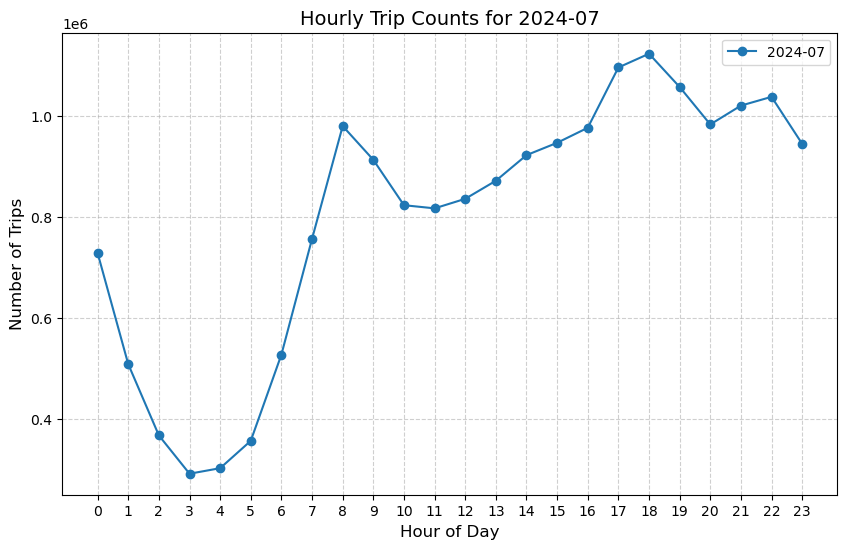

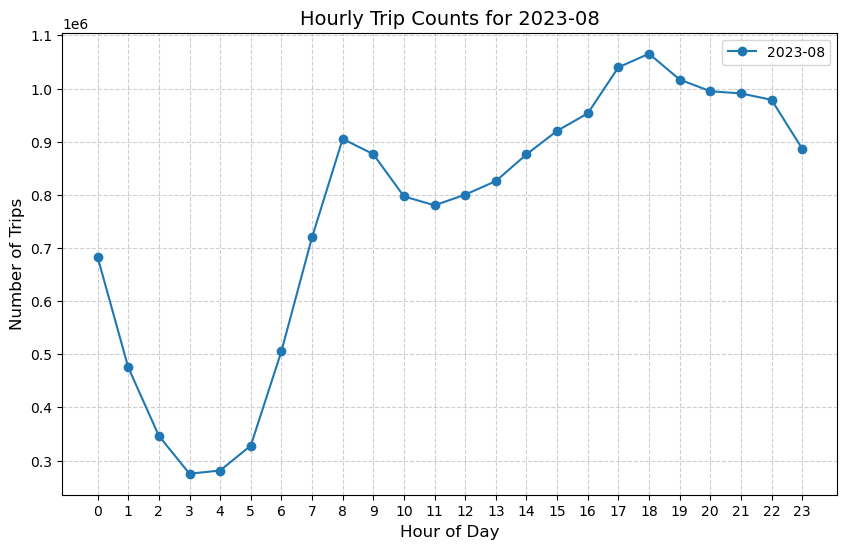

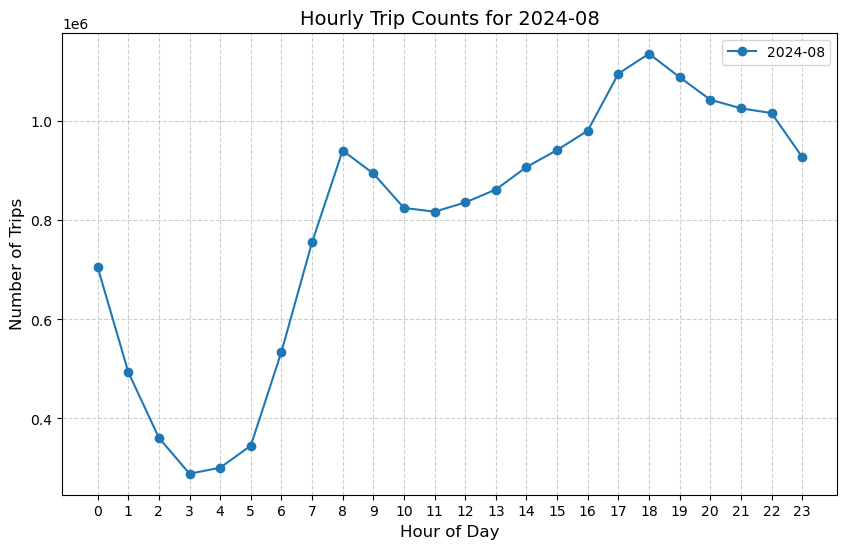

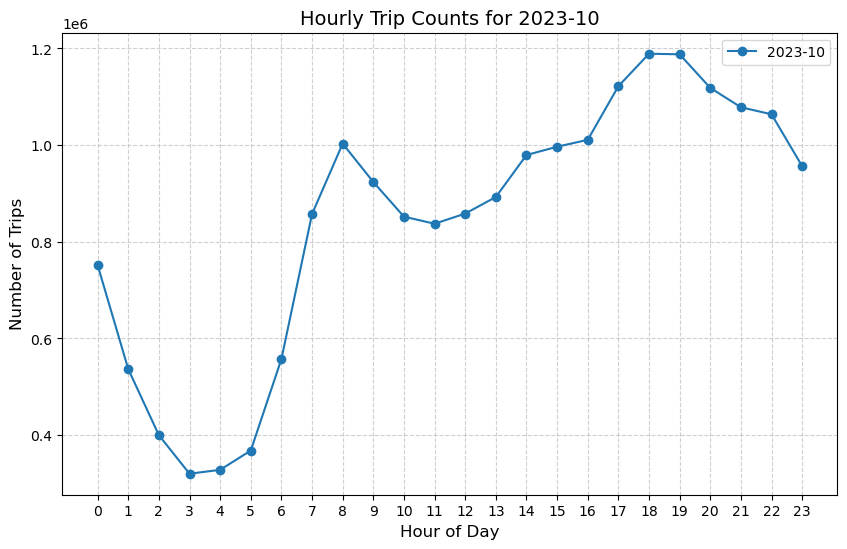

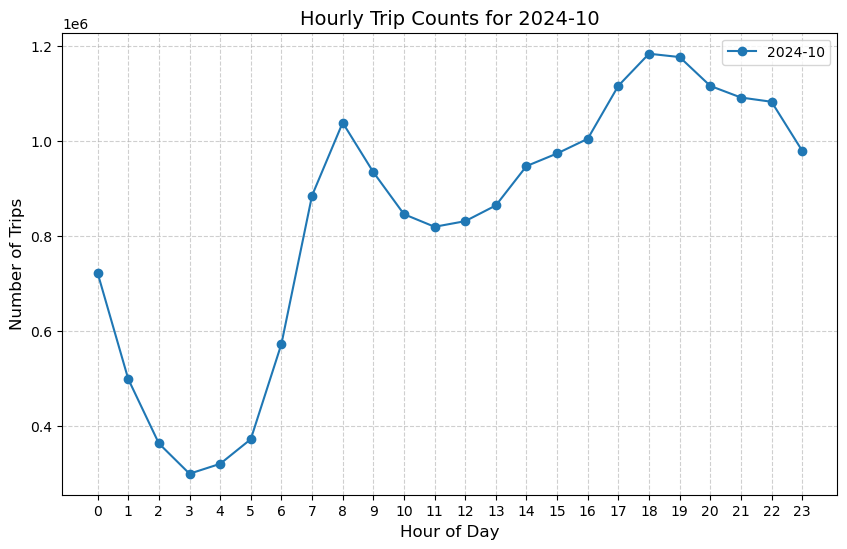

In [3]:
base_path = r"C:\Users\r-cet\OneDrive\Desktop\BA"
months = range(1, 11)
result = compare_monthly_stats(2023, 2024, months, base_path)

In [4]:
for month, counts in result.items():
    print(f"Month {month:02d}: {counts}")

Month 01: {'2023': {'Row Count': 18479031, 'Avg Miles': 4.870138037541028, 'Avg Time (min)': 18.243900559504446}, '2024': {'Row Count': 19663930, 'Avg Miles': 4.838586508088658, 'Avg Time (min)': 18.507828750407473}}
Month 02: {'2023': {'Row Count': 17960971, 'Avg Miles': 4.8148248411514025, 'Avg Time (min)': 18.438383270035903}, '2024': {'Row Count': 19359148, 'Avg Miles': 4.930509447419889, 'Avg Time (min)': 19.198640752854068}}
Month 03: {'2023': {'Row Count': 20413539, 'Avg Miles': 4.938423634285069, 'Avg Time (min)': 19.254218509098298}, '2024': {'Row Count': 21280788, 'Avg Miles': 4.9504997448872725, 'Avg Time (min)': 19.647732485282027}}
Month 04: {'2023': {'Row Count': 19144903, 'Avg Miles': 5.020918498098424, 'Avg Time (min)': 19.349113650945807}, '2024': {'Row Count': 19733038, 'Avg Miles': 5.037789542340111, 'Avg Time (min)': 19.824181015614524}}
Month 05: {'2023': {'Row Count': 19847676, 'Avg Miles': 5.153654019694795, 'Avg Time (min)': 20.555551159574886}, '2024': {'Row Co

In [5]:
data = []
for month, years in result.items():
    if isinstance(years, str):
        data.append([month, "Error", None, None, None])
    else:
        for year, stats in years.items():
            data.append([month, year, stats["Row Count"], stats["Avg Miles"], stats["Avg Time (min)"]])

columns = ["Month", "Year", "Row Count", "Avg Miles", "Avg Time (min)"]
df = pd.DataFrame(data, columns=columns)

print(df)

    Month   Year   Row Count  Avg Miles  Avg Time (min)
0       1   2023  18479031.0   4.870138       18.243901
1       1   2024  19663930.0   4.838587       18.507829
2       2   2023  17960971.0   4.814825       18.438383
3       2   2024  19359148.0   4.930509       19.198641
4       3   2023  20413539.0   4.938424       19.254219
5       3   2024  21280788.0   4.950500       19.647732
6       4   2023  19144903.0   5.020918       19.349114
7       4   2024  19733038.0   5.037790       19.824181
8       5   2023  19847676.0   5.153654       20.555551
9       5   2024  20704538.0   5.145416       21.039003
10      6   2023  19366619.0   5.134284       20.219176
11      6   2024  20123226.0   5.172981       20.667063
12      7   2023  19132131.0   5.134859       19.473960
13      7   2024  19182934.0   5.150312       19.672006
14      8   2023  18322150.0   5.230754       19.800580
15      8   2024  19128392.0   5.183740       19.845482
16      9  Error         NaN        NaN         